In [2]:
import nilearn
import brainspace
import numpy as np
import os
import nibabel as nib
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from austin_utils import save_gifti
from neuromaps.transforms import fsaverage_to_fslr

In [3]:
# Resampling Margulies et al 2016 gradients from fsaverage6 to fslr 4k
# will be used for alignment

margulies_gradients = []
for gradient in ["1", "2", "3"]:
    margulies_gradL = fsaverage_to_fslr("HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_%s.L.fsa6.func.gii" % (gradient), "32k", "L")
    save_gifti(margulies_gradL[0].agg_data(), "HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.L.32k.fslr" % (gradient))
    margulies_gradR = fsaverage_to_fslr("HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_%s.R.fsa6.func.gii" % (gradient), "32k", "R")
    save_gifti(margulies_gradR[0].agg_data(), "HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.R.32k.fslr" % (gradient))
    margulies_gradient = np.concatenate((margulies_gradL[0].agg_data(), margulies_gradL[0].agg_data()))
    margulies_gradients.append(margulies_gradient)
    

In [23]:
np.where(margulies_gradients[0] == 0)[0].shape
margulies_gradients[0].shape[0] - gradients_ses1[0].shape[1]


(6238,)

5572

In [24]:
for gradient in [1, 2 ,3]:
    os.system("wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_%s.L.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.L.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.L.32k.fslr.func.gii -area-metrics " % (gradient, gradient))
    os.system("wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_%s.R.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.R.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.R.32k.fslr.func.gii -area-metrics " % (gradient, gradient))


While running:
/Applications/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_1.L.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.L.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_1.L.32k.fslr.func.gii

ERROR: specified method does area correction, but no vertex area data given



65280


While running:
/Applications/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_1.R.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.R.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_1.R.32k.fslr.func.gii

ERROR: specified method does area correction, but no vertex area data given



65280


While running:
/Applications/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_2.L.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.L.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_2.L.32k.fslr.func.gii

ERROR: specified method does area correction, but no vertex area data given



65280


While running:
/Applications/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_2.R.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.R.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_2.R.32k.fslr.func.gii

ERROR: specified method does area correction, but no vertex area data given



65280


While running:
/Applications/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_3.L.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.L.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_3.L.32k.fslr.func.gii

ERROR: specified method does area correction, but no vertex area data given



65280


While running:
/Applications/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsaverage/hcp.embed.grad_3.R.fsa6.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/sphere.fsa6.40k.R.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii ADAP_BARY_AREA /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_3.R.32k.fslr.func.gii

ERROR: specified method does area correction, but no vertex area data given



65280

In [99]:
%%capture
for gradient in ["1", "2", "3"]:
    os.system("wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.L.32k.fslr.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.4k_fs_LR.surf.gii BARYCENTRIC /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.L.4k.fslr.func.gii" % (gradient, gradient))
    os.system("wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.R.32k.fslr.func.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.4k_fs_LR.surf.gii BARYCENTRIC /Users/VictoriaShevchenko/Documents/PhD/HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.R.4k.fslr.func.gii" % (gradient, gradient))

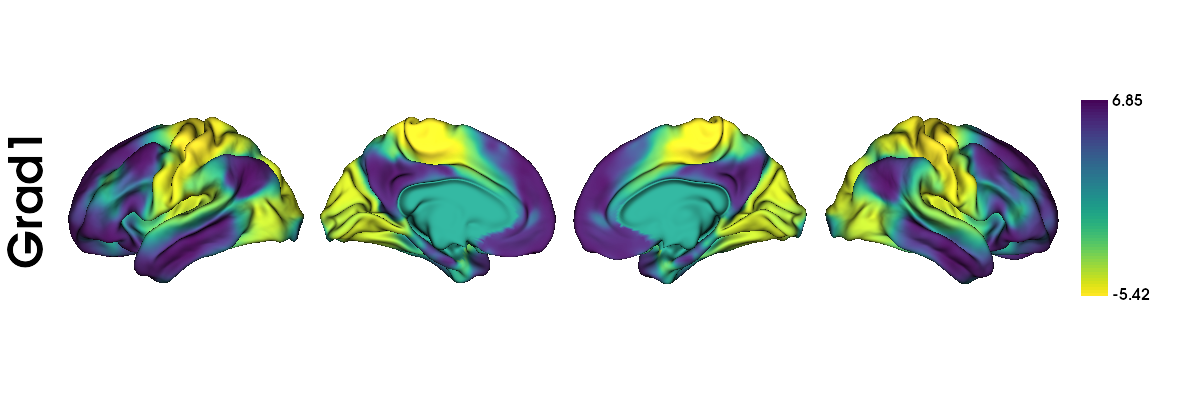

In [86]:
# sanity check
from brainspace.plotting.surface_plotting import plot_hemispheres
from brainspace.datasets import load_conte69
surf_lh, surf_rh = load_conte69()
plot_hemispheres(surf_lh, surf_rh, array_name=margulies_1grad, size=(1200, 400), cmap='viridis_r',
                 color_bar=True, label_text=['Grad1'], zoom=1.2, embed_nb = True)

In [4]:
grads = ["1", "2", "3"]
directory = "HCP/Gradients_Margulies2016/fsLR/"
sessions_4k = []
wb_margulies_4kgradients = []
for grad in grads:
    path_L = directory + "hcp.embed.grad_%s.L.4k.fslr.func.gii" % (grad)
    path_R = directory + "hcp.embed.grad_%s.R.4k.fslr.func.gii" % (grad)
    gradient_L = nib.load(path_L).agg_data()
    gradient_R = nib.load(path_R).agg_data()
    gradient = np.concatenate((gradient_L, gradient_R))
    wb_margulies_4kgradients.append(gradient)
wb_margulies_4kgradients = np.stack((wb_margulies_4kgradients))


In [5]:
labs_4kL =nib.load("HCP/labels/fsLR.4k.L.label.gii").agg_data()
labs_4kR =nib.load("HCP/labels/fsLR.4k.R.label.gii").agg_data()

labs_4k = np.concatenate((labs_4kL, labs_4kR))

In [6]:
labs_margulies_4k = labs_4k
labs_margulies_4k[np.where(wb_margulies_4kgradients[0] == 0)] = 0

In [7]:
from neuromaps.datasets import fetch_fslr

fetch_fslr(data_dir = "HCP/surfaces")

 ...done. (2 seconds, 0 min)
Extracting data from HCP/surfaces/599046a594e0e45c04e90291c2348cbe/fsLR32k.tar.gz..... done.


{'midthickness': Surface(L=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'), R=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-R_midthickness.surf.gii')),
 'inflated': Surface(L=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-L_inflated.surf.gii'), R=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-R_inflated.surf.gii')),
 'veryinflated': Surface(L=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-L_veryinflated.surf.gii'), R=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-R_veryinflated.surf.gii')),
 'sphere': Surface(L=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-L_sphere.surf.gii'), R=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-R_sphere.surf.gii')),
 'medial': Surface(L=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-L_desc-nomedialwall_dparc.label.gii'), R=PosixPath('HCP/surfaces/atlases/fsLR/tpl-fsLR_den-32k_hemi-R_desc-nomedialwall_dparc.label.gii')),
 '

/var/folders/2m/72fcyjmd7vs3g18rkfwx7nw40000gn/T/ipykernel_26415/193395335.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  margulies_1grad_plot.show()


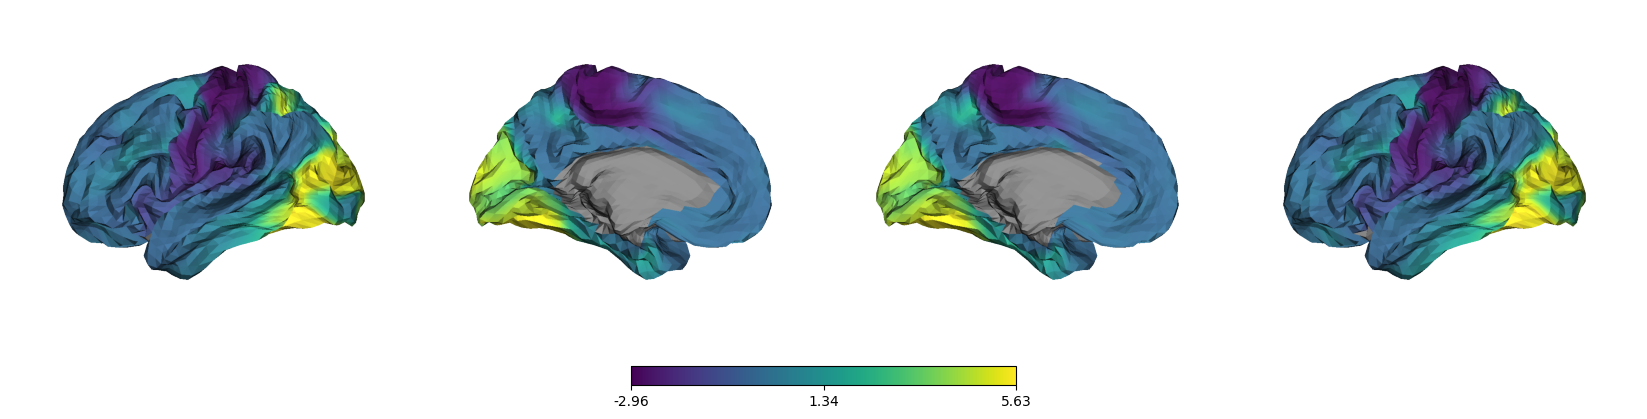

In [8]:
from surfplot.plotting import Plot

#margulies_1grad_plot = Plot("HCP/surfaces/tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii", "HCP/surfaces/tpl-fsLR_den-32k_hemi-R_midthickness.surf.gii", layout='row', zoom=1.2, size=(2000,400), mirror_views=False) 
margulies_1grad_plot = Plot("HCP/surfaces/fslr_L_mid_4k.surf.gii", "HCP/surfaces/fslr_L_mid_4k.surf.gii", layout='row', zoom=1.2, size=(2000,400), mirror_views=False) 

margulies_1grad_plot.add_layer(wb_margulies_4kgradients[1], cmap='viridis')
margulies_1grad_plot = margulies_1grad_plot.build()
margulies_1grad_plot.show()



In [6]:
for array, gradient in zip(margulies_gradients, [1, 2, 3]):
    np.save(arr = array, file = "HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_%s.fsLR.4k.npy" % gradient)

In [9]:
np.load("HCP/Gradients_Margulies2016/fsLR/hcp.embed.grad_1.fsLR.4k.npy")

array([ 6.361778 , -4.9964204, -3.0768661, ..., -4.4960356, -4.251711 ,
       -4.4111915], dtype=float32)

In [40]:
# fslr 32k labels
lab_l = nib.load('HCP/labels/fsLR.32k.L.label.gii').agg_data()
lab_r = nib.load('HCP/labels/fsLR.32k.R.label.gii').agg_data()
labs  = np.concatenate((lab_l, lab_r))

In [12]:
subjects = ["100206", "100307", "100408", "100610", "101006"]
gradient_list = []
for subject in subjects:
    gradient = np.load("HCP/Gradients/%s/%s.mapalign.ses1.diffmap.s02mm.npy" % (subject, subject))
    gradient_list.append(gradient)

gradients_ses1 = np.stack((gradient_list))

gradient_list = []
for subject in subjects:
    gradient = np.load("HCP/Gradients/%s/%s.mapalign.ses2.diffmap.s02mm.npy" % (subject, subject))
    gradient_list.append(gradient)

gradients_ses2 = np.stack((gradient_list))

In [4]:
labeled_grads_ses1 = np.zeros((5, 3, 32492*2))

for subject, subject_map in zip(gradients_ses1, labeled_grads_ses1):
    subject_map[0][labs != 0] = subject[0]
    subject_map[1][labs != 0] = subject[1]
    subject_map[2][labs != 0] = subject[2]


labeled_grads_ses2 = np.zeros((5, 3, 32492*2))

for subject, subject_map in zip(gradients_ses2, labeled_grads_ses2):
    subject_map[0][labs != 0] = subject[0]
    subject_map[1][labs != 0] = subject[1]
    subject_map[2][labs != 0] = subject[2]

In [5]:
sessions = [labeled_grads_ses1, labeled_grads_ses2] #saving each gradient as gifti
hemi_L = "L"
hemi_R = "R"
grads = ["1", "2", "3"]
filenames_L= []
filenames_R = []
gii_paths_L= []
gii_paths_R = []
for session, session_n in zip(sessions, ["1", "2"]):
    for subject, id in zip(session, subjects):
        for gradient_array, grad in zip(subject, grads):
            filename_L = "%s_grad%s_ses%s_%s" % (id, grad, session_n, hemi_L)
            filename_R = "%s_grad%s_ses%s_%s" % (id, grad, session_n, hemi_R)
            save_gifti(gradient_array[:int(len(gradient_array)/2)], filename_L)
            save_gifti(gradient_array[int(len(gradient_array)/2):], filename_R)
            filenames_L.append(filename_L)
            filenames_R.append(filename_R)
            gii_paths_L.append("/Users/VictoriaShevchenko/Documents/PhD/"+ filename_L + ".func.gii")
            gii_paths_R.append("/Users/VictoriaShevchenko/Documents/PhD/"+ filename_R + ".func.gii")

In [6]:
%%capture
# Resampling surface gradient maps to 4k
directory = "/Users/VictoriaShevchenko/Documents/PhD/HCP/resampled_grads/"
import os
for path_L, filename_L in zip(gii_paths_L, filenames_L):
    out_file = directory + filename_L + "4k.func.gii"
    os.system("wb_command -metric-resample %s /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.4k_fs_LR.surf.gii BARYCENTRIC %s" %(path_L, out_file))

for path_R, filename_R in zip(gii_paths_R, filenames_R):
    out_file = directory + filename_R + "4k.func.gii"
    os.system("wb_command -metric-resample %s /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.4k_fs_LR.surf.gii BARYCENTRIC %s" %(path_R, out_file))

In [41]:
# resampling labels
os.system("wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.32k.L.label.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.4k_fs_LR.surf.gii BARYCENTRIC /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.4k.L.label_metric.gii")
os.system("wb_command -metric-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.32k.R.label.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.4k_fs_LR.surf.gii BARYCENTRIC /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.4k.R.label_metric.gii")

os.system("wb_command -label-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.32k.L.label.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.L.sphere.4k_fs_LR.surf.gii BARYCENTRIC /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.4k.L.label.gii")
os.system("wb_command -label-resample /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.32k.R.label.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.32k_fs_LR.surf.gii /Users/VictoriaShevchenko/Documents/PhD/HCP/spheres/S1200.R.sphere.4k_fs_LR.surf.gii BARYCENTRIC /Users/VictoriaShevchenko/Documents/PhD/HCP/labels/fsLR.4k.R.label.gii")

0

0

0

0